# LOW CODE ASSIGNMENTS PART 2

## **Pycaret: Clustering**

#### Installing required libraries

In [ ]:
!pip install pycaret
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 713.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

<br>
<br>
<br>

### **Downloading the Wholesale Customers Data dataset**

In [ ]:
!kaggle datasets download -d binovi/wholesale-customers-data-set

Dataset URL: https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set
License(s): CC0-1.0
  0% 0.00/6.85k [00:00<?, ?B/s]
100% 6.85k/6.85k [00:00<00:00, 10.1MB/s]


In [ ]:
!unzip wholesale-customers-data-set.zip

Archive:  wholesale-customers-data-set.zip
  inflating: Wholesale customers data.csv  


### **Loading required libraries**

In [ ]:
import numpy as np
import pandas as pd
from pycaret.clustering import *

<br>
<br>
<br>


### **Loading the Wholesale Customers Data dataset**

In [ ]:
print("Loading Kaggle Wholesale Customers Data dataset...")
data = pd.read_csv('Wholesale customers data.csv')
data.head()

Loading Kaggle Wholesale Customers Data dataset...


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### **Setting up Pycaret**

In [ ]:
clf_setup = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(440, 8)"
2,Transformed data shape,"(440, 8)"
3,Numeric features,8
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


### **Creating Models**

**Training the K-Means Model**

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3617,194.8714,0.9530,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Checking for available models

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


**Assigning cluster labels to the training data**

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,Cluster 2
1,2,3,7057,9810,9568,1762,3293,1776,Cluster 2
2,2,3,6353,8808,7684,2405,3516,7844,Cluster 2
3,1,3,13265,1196,4221,6404,507,1788,Cluster 1
4,2,3,22615,5410,7198,3915,1777,5185,Cluster 1
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,Cluster 1
436,1,3,39228,1431,764,4510,93,2346,Cluster 3
437,2,3,14531,15488,30243,437,14841,1867,Cluster 0
438,1,3,10290,1981,2232,1038,168,2125,Cluster 2


### **Visualizations**

In [ ]:
plot_model(kmeans, plot = 'cluster')

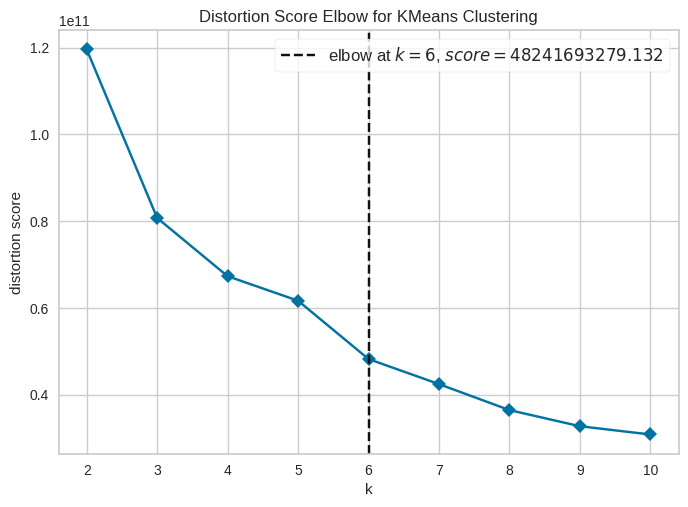

In [ ]:
plot_model(kmeans, plot = 'elbow')

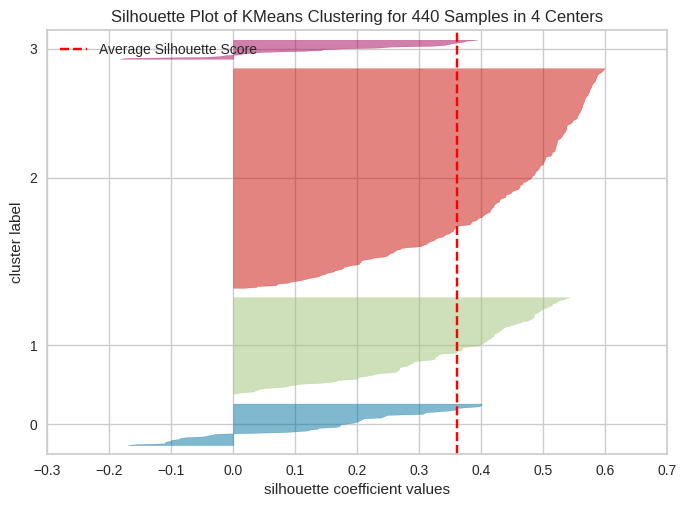

In [ ]:
plot_model(kmeans, plot = 'silhouette')

The `evaluate_model` is an alternate to `plot_model`. However, it can only be used in Notebook since it uses `ipywidget`.

### **Predicting on the test dataset**

In [ ]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,Cluster 2
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,Cluster 2
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,Cluster 2
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,Cluster 1
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,Cluster 1
...,...,...,...,...,...,...,...,...,...
435,1.0,3.0,29703.0,12051.0,16027.0,13135.0,182.0,2204.0,Cluster 1
436,1.0,3.0,39228.0,1431.0,764.0,4510.0,93.0,2346.0,Cluster 3
437,2.0,3.0,14531.0,15488.0,30243.0,437.0,14841.0,1867.0,Cluster 0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,Cluster 2


### **Saving Model**

In [ ]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Channel', 'Region', 'Fresh',
                                              'Milk', 'Grocery', 'Frozen',
                                              'Detergents_Paper', 'Delicassen'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'kmeans_pipeline.pkl')

### **Loading the saved model**

In [ ]:
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Channel', 'Region', 'Fresh',
                                             'Milk', 'Grocery', 'Frozen',
                                             'Detergents_Paper', 'Delicassen'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])